#**World Population Analysis and Prediction using ML**

Project Type - Regression

#**Problem Statement**

The world's population is constantly changing, with significant implications for resource allocation, urban planning, and environmental sustainability. Accurately forecasting future population growth is crucial for policymakers and organizations to make informed decisions. This project aims to leverage historical population data and machine learning techniques to analyze global population trends, identify key factors driving population change, and develop predictive models to estimate future population growth with higher precision and reliability. The insights gained from this analysis will assist in understanding demographic dynamics and planning for the challenges and opportunities associated with a growing global population.


#**1. Know Your Data**

### **Import Libraries**

In [ ]:
# Data Manipulation and Analysis
import pandas as pd  # For data manipulation and analysis using DataFrames
import numpy as np  # For numerical operations and array processing

# Visualization
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For statistical data visualization
import plotly.express as px  # For creating interactive visualizations

# Machine Learning and Modeling
import xgboost as xgb  # For gradient boosting algorithms
from xgboost import XGBRegressor  # For XGBoost regression model
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split, cross_val_score  # For data splitting and model evaluation
from sklearn.linear_model import LinearRegression  # For linear regression model
from sklearn.tree import DecisionTreeRegressor  # For decision tree regression model
from sklearn.neighbors import KNeighborsRegressor  # For K-Nearest Neighbors regression model
from sklearn.ensemble import RandomForestRegressor  # For random forest regression model
from sklearn.svm import SVR  # For Support Vector Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation metrics

# Warnings and Utilities
import warnings  # For handling warning messages
warnings.filterwarnings('ignore')  # To ignore warnings during execution

###**Dataset Loading**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/world_population.csv")

###**Dataset First View**

In [ ]:
# Dataset First Look
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


###**Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
df.shape

(234, 17)

###**Dataset Information**

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

###**Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


###**Missing Values/Null Values**

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


**What did you know about your dataset?**

There are zero missing values and zero duplicated values in the dataset. Also there are 234 entries in the dataset, where dtype of float64(3), int64(10), object(4).

#**2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [ ]:
# Dataset Describe
print("Population Descriptive Statistics:")
df.describe()

Population Descriptive Statistics:


,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


**Variables Description**

● Rank: Rank by Population.

● CCA3: 3 Digit Country/Territories Code.

● Country/Territories: Name of the Country/Territories.

● Capital: Name of the Capital.

● Continent: Name of the Continent.

● 2022 Population: Population of the Country/Territories in the year 2022.

● 2020 Population: Population of the Country/Territories in the year 2020.

● 2015 Population: Population of the Country/Territories in the year 2015.

● 2010 Population: Population of the Country/Territories in the year 2010.

● 2000 Population: Population of the Country/Territories in the year 2000.

● 1990 Population: Population of the Country/Territories in the year 1990.

● 1980 Population: Population of the Country/Territories in the year 1980.

● 1970 Population: Population of the Country/Territories in the year 1970.

● Area (km²): Area size of the Country/Territories in square kilometer.

● Density (per km²): Population Density per square kilometer.

● Growth Rate: Population Growth Rate by Country/Territories.

● World Population Percentage: The population percentage by each Country/Territories

###**Check Unique Values for each variable**

In [ ]:
df.nunique()

,0
Rank,234
CCA3,234
Country/Territory,234
Capital,234
Continent,6
2022 Population,234
2020 Population,234
2015 Population,234
2010 Population,234
2000 Population,234


#**3. Data Wrangling**

###**Data Wrangling Code**

In [ ]:
# Write code to make your dataset analysis ready.
# Drop 'CCA3' and 'Capital' columns since we won't be using them in the analysis
df.drop(['CCA3', 'Capital'], axis=1, inplace=True)
df.rename(columns={'Country/Territory': 'Country'}, inplace=True)

In [ ]:
df.head()

,Rank,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.head()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
categorical_features.head()

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe


**What all manipulations have you done and insights you found?**

Dropped the features CCA3 and Capital is not necessary for the analysis. Changed the feature name Country/Territiory to Country for convenience.There are 13 numerical features and 2 categorical features in the dataset.

#**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

In [ ]:
sns.set_style(style='white')

###**Chart 1 - Histogram of 2022 Population**

<function matplotlib.pyplot.show(close=None, block=None)>

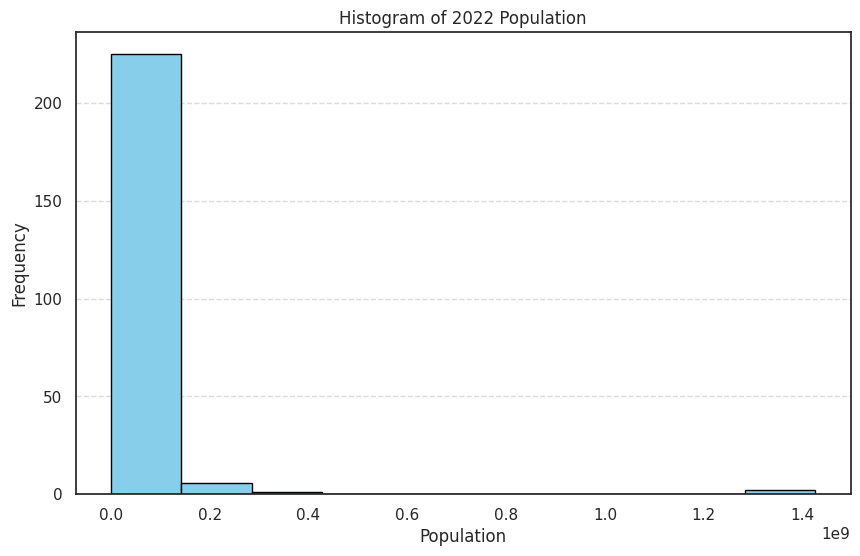

In [ ]:
#Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['2022 Population'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of 2022 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show

**Descriptione**

The histogram of the 2022 population distribution across various entities. It is interesting and relevant because it provides a visual representation of how populations are spread out, highlighting the fact that most entities have small populations while only a few have very large populations. This information is crucial for businesses and policymakers for making informed decisions regarding market strategies and resource allocation.

**1. Why did you pick the specific chart?**

A histogram was chosen because it effectively displays the distribution of population sizes across various entities, likely countries. It allows for a clear visualization of how populations are spread out, highlighting the frequency of different population ranges.

**2. What is/are the insight(s) found from the chart?**

* Skewed Distribution: The histogram shows a highly skewed distribution with the majority of entities having populations close to zero. This indicates that most countries have relatively small populations.

* Few Large Populations: There are very few entities with populations exceeding 200 million. Only a couple of entities have populations around 1.4 billion, which likely represent the most populous countries in the world.

* High Frequency of Small Populations: The highest frequency bar is at the lower end of the population scale, indicating that a large number of entities have small populations.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

* Market Segmentation: Businesses can use this information to segment markets based on population size, targeting marketing efforts more effectively.

* Resource Allocation: Companies can allocate resources more efficiently by focusing on regions with higher population densities for products and services that benefit from larger markets.

* Strategic Planning: Understanding population distribution helps in strategic planning for expansion, product launches, and supply chain management.

**Negative Impacts**

There are no direct insights from the histogram that would lead to negative growth.

###**Chart 2 - Line Chart of Population Growth Over Time**

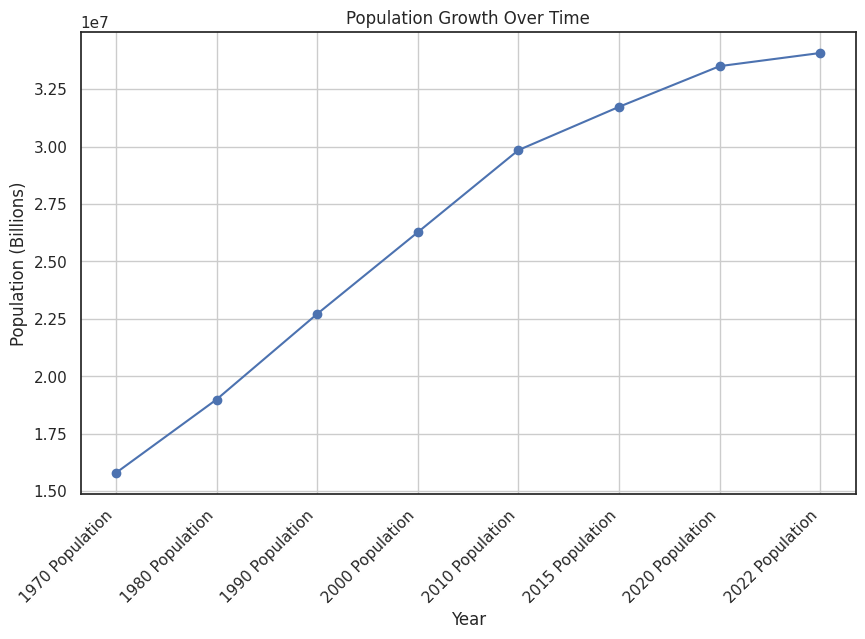

In [ ]:
# Chart - 2 visualization code

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Reshape data for plotting
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']
population_data = df[years].mean()  # Calculate average population for each year

# Plot the data
plt.plot(population_data.index, population_data.values, marker='o')

# Adding titles and labels
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Description**

The line chart depicting the population growth over time from 1970 to 2022. It is interesting and relevant because it provides a clear visual representation of how the global population has increased over the past five decades.

**1. Why did you pick the specific chart?**

The line chart was chosen because it effectively illustrates the trend of population growth over a significant period, from 1970 to 2022. Line charts are particularly useful for showing changes over time and identifying trends, making them ideal for this type of data.

**2. What is/are the insight(s) found from the chart?**

* Steady Growth: The population has been steadily increasing from 1970 to 2022.

* Rate of Increase: The rate of population growth appears to be consistent, with no significant dips or spikes.

* Recent Plateau: There is a slight plateau or slower growth rate observed around 2020 to 2022.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason**.

**Positive Impacts :**

Market Expansion: Businesses can plan for market expansion and product development based on the growing population.

Resource Allocation: Companies can allocate resources more efficiently, knowing that the demand for goods and services is likely to increase with population growth.

Strategic Planning: Long-term strategic planning can be informed by understanding population trends, helping businesses to anticipate future needs and opportunities.

**Negative Impacts :**

There are no insights from the chart that indicate negative growth. The population has been consistently increasing over the years. However, the slight plateau observed around 2020 to 2022 could suggest a slowing growth rate, which might indicate potential challenges in the future, such as resource constraints or economic factors that could impact further growth. This plateau should be monitored to understand its causes and implications better.

###**Chart 3 - Bar Chart of Countries by Area (km²)**

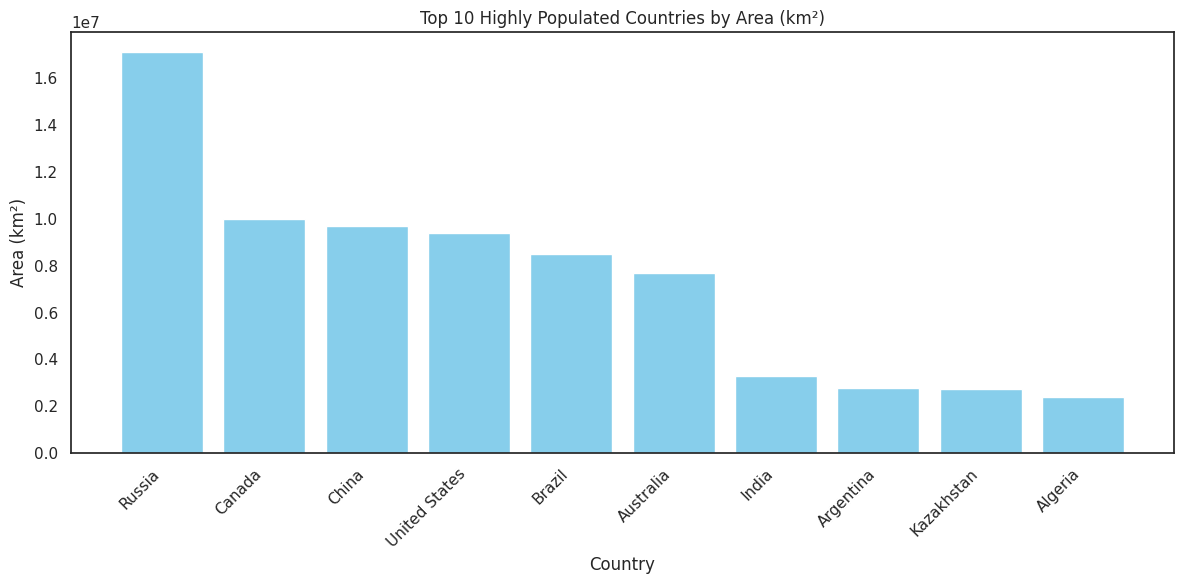

In [ ]:
# Chart - 3 visualization code

# Sort by Area and select top 10
top_10_by_area = df.sort_values(by=['Area (km²)'], ascending=False).head(10)

# Extract Country and Area data
countries = top_10_by_area['Country']
areas = top_10_by_area['Area (km²)']

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(countries, areas, color='skyblue')
plt.title('Top 10 Highly Populated Countries by Area (km²)')
plt.xlabel('Country')
plt.ylabel('Area (km²)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Description**

The bar chart that shows the land area of the top 10 highly populated countries. It is interesting and relevant because it provides a visual comparison of the land sizes of these countries, which can be useful for various strategic and analytical purposes.

**1. Why did you pick the specific chart?**

The bar chart was chosen because it effectively visualizes the comparative land areas of the top 10 highly populated countries. It provides a clear and straightforward way to understand the differences in land area among these countries, which can be crucial for various analyses, including economic, environmental, and demographic studies.

**2. What are the insights found from the chart?**

Russia has the largest land area by a significant margin, with an area of approximately 1.6e7 km².

Canada, China, and the United States also have substantial land areas, each exceeding 0.9e7 km².

Brazil and Australia have moderately large areas, around 0.8e7 km² and 0.7e7 km², respectively.

India, Argentina, Kazakhstan, and Algeria have relatively smaller land areas compared to the top six countries, with areas ranging from approximately 0.3e7 km² to 0.2e7 km².

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

Market Expansion: Businesses looking to expand geographically can use this data to identify countries with large land areas, which might indicate more diverse markets and opportunities for regional expansion.

Resource Allocation: Companies involved in agriculture, mining, or real estate can use this information to target countries with larger land areas for resource extraction or development projects.

Logistics and Distribution: Understanding the land area can help businesses plan logistics and distribution networks more efficiently, especially in countries with vast territories.

**Negative Impacts :**

There are no direct insights from the chart that would inherently lead to negative growth. However, some considerations might include:

Infrastructure Challenges: Countries with large land areas, such as Russia and Canada, might face significant infrastructure challenges, including transportation and communication networks, which could impact business operations and growth negatively.

Environmental Concerns: Large land areas might also mean more significant environmental management issues, which could pose challenges for businesses in terms of sustainability and regulatory compliance.

###**Chart 4 - Box Plot of Population Density (per km²)**

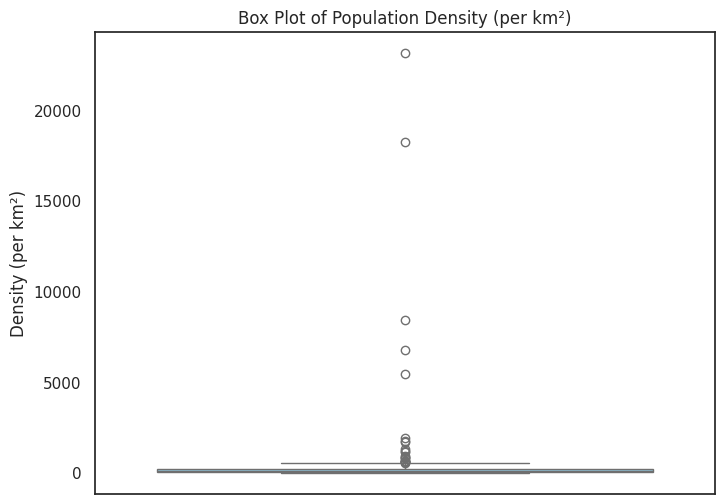

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Density (per km²)'], color='skyblue')
plt.title('Box Plot of Population Density (per km²)')
plt.ylabel('Density (per km²)')
plt.show()

**Description**

The box plot displays the distribution of population density (per km²). The plot includes a box representing the interquartile range, a line indicating the median, and several outliers marked above the upper quartile. This visualization is relevant for understanding the spread and central tendency of population density data, as well as identifying regions with exceptionally high densities.

**1. Why did you pick the specific chart?**

The box plot was chosen because it effectively summarizes the distribution of population density data, highlighting the median, quartiles, and potential outliers. It provides a clear visual representation of the spread and skewness of the data, making it easier to identify patterns and anomalies.

**2. What is/are the insight(s) found from the chart?**

The median population density is relatively low, as indicated by the position of the central line within the box.

The interquartile range (IQR), represented by the length of the box, is quite small, suggesting that most of the population densities are clustered around the median.

There are several significant outliers with very high population densities, far above the upper quartile. These outliers indicate regions with exceptionally high population densities compared to the rest of the dataset.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

Resource Allocation: Understanding areas with high population density can help businesses allocate resources more efficiently, targeting regions with higher demand for products and services.

Market Analysis: Identifying densely populated areas can assist in market analysis and strategic planning, enabling businesses to focus on high-potential markets.

Urban Planning: For businesses involved in urban development, these insights can guide infrastructure development and investment decisions.

**Negative Impacts :**

Overcrowding: High population density areas might face issues related to overcrowding, such as increased competition, higher costs of living, and strain on infrastructure. These factors can negatively impact business operations and profitability.

Resource Strain: Regions with extremely high population densities might experience resource strain, leading to challenges in maintaining supply chains and meeting consumer demands.

###**Chart 5 - Scatter Plot of Population vs. Area**

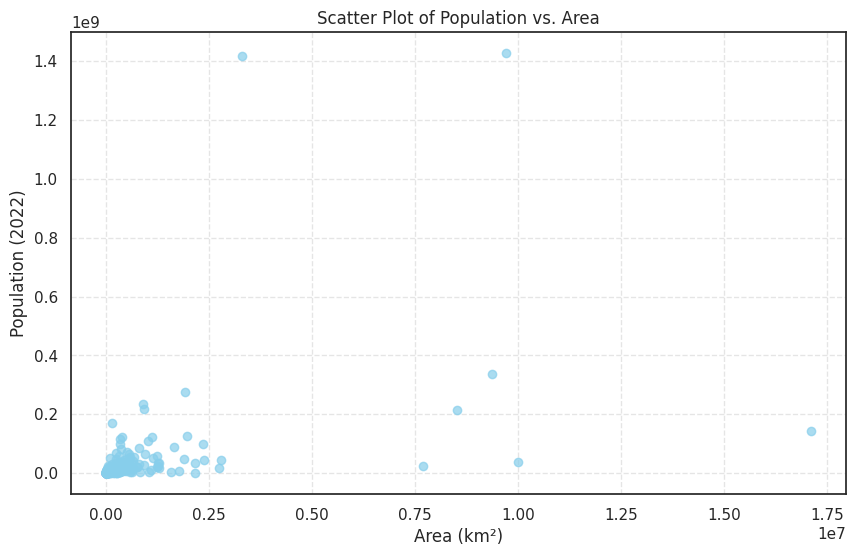

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(10, 6))
plt.scatter(df['Area (km²)'], df['2022 Population'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Population vs. Area')
plt.xlabel('Area (km²)')
plt.ylabel('Population (2022)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Description**

The scatter plot visualizes the relationship between the population in 2022 and the area in square kilometers. It highlights how population density varies across different regions, revealing clusters and outliers that can inform business strategies and policy decisions.

**1. Why did you pick the specific chart?**

The scatter plot is chosen because it effectively visualizes the relationship between two continuous variables: population and area. It allows for the identification of patterns, trends, and outliers in the data, which can be crucial for understanding how population density varies with the size of a region.

**2. What is/are the insight(s) found from the chart?**

* Cluster of Small Areas with Low Population: Most of the data points are clustered in the lower left corner of the plot, indicating that many regions have both small areas and low populations.

* Outliers with Large Populations: There are a few outliers with very high populations (close to 1.4e9), which likely represent highly populous countries.

* Large Areas with Moderate Populations: Some data points represent large areas with moderate populations, indicating regions with low population density.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

* Market Targeting: Businesses can identify densely populated regions to target for consumer goods and services.

* Resource Allocation: Companies can allocate resources more efficiently by understanding population distribution.

* Infrastructure Planning: Insights into population density can aid in infrastructure development and urban planning.

**Negative Impacts :**

* Overcrowded Markets: Highly populated areas might already be saturated with businesses, leading to intense competition and reduced profitability.

* Logistical Challenges: Large areas with low population density might pose logistical challenges and higher costs for businesses trying to reach a dispersed customer base.

###**Chart 6 - Pie Chart of World Population Percentage by Country**

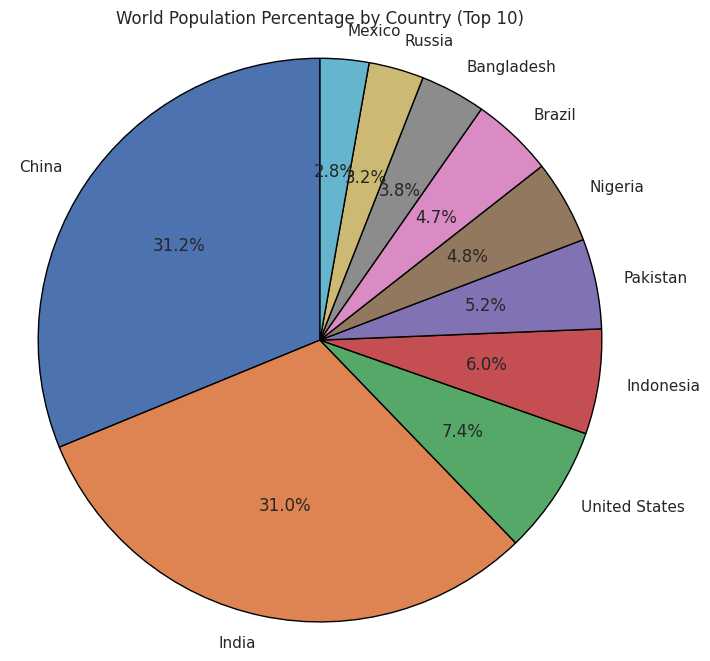

In [ ]:
# Chart - 6 visualization code

# Select top 10 countries for the pie chart
top_n = 10
top_countries = df.sort_values(by=['World Population Percentage'], ascending=False).head(top_n)

# Extract data for the pie chart
labels = top_countries['Country']
sizes = top_countries['World Population Percentage']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.title('World Population Percentage by Country (Top {})'.format(top_n))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Description**

The pie chart shows the percentage of the world's population that resides in the top 10 most populous countries. Each segment of the pie chart represents a different country, with the percentage of the world population labeled on each segment.

It highlights the significant concentration of the world's population in a few countries, which has important implications for global economics, business strategies, and resource distribution.

**1. Why did you pick the specific chart?**

The pie chart was chosen because it effectively visualizes the distribution of the world's population among the top 10 most populous countries. It provides a clear and immediate understanding of how the global population is concentrated in these countries, making it easy to compare their relative sizes.

**2. What is/are the insight(s) found from the chart?**

Dominant Populations: The chart highlights that a significant portion of the world's population is concentrated in just a few countries. For instance, China and India together account for over 62% of the global population (31.2% and 31.0%, respectively).

Top Contributors: The next largest segments include the United States (7.4%), Indonesia (6.0%), and Pakistan (5.2%), each contributing a notable portion to the global population.

Smaller Contributions: Countries like Nigeria, Brazil, Bangladesh, Russia, and Mexico each contribute less than 5% to the world population, indicating a more dispersed population distribution among these countries.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

Market Targeting: Businesses can focus their marketing and expansion efforts on China and India, given their large population sizes, which represent substantial market opportunities.

Resource Allocation: Companies can allocate resources more efficiently by understanding where the largest customer bases are located.

Product Development: Insights into population distribution can guide product development to meet the needs and preferences of the largest demographic groups.

**Negative Impacts :**

There are no direct insights from the chart that lead to negative growth. However, businesses that fail to recognize the importance of the large populations in China and India may miss out on significant market opportunities, potentially leading to slower growth compared to competitors who capitalize on these insights. Additionally, over-reliance on markets with smaller population percentages may limit a company's growth potential.

###**Chart 7 - Histogram of Growth Rate**

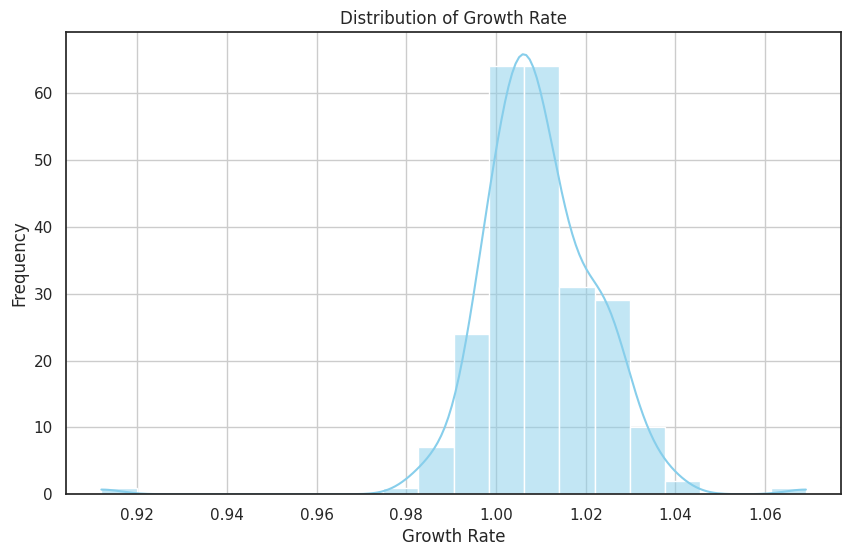

In [ ]:
# Chart - 7 visualization code

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth Rate'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Description**

The histogram represents the growth rate, ranging from approximately 0.92 to 1.06, while the y-axis represents the frequency of occurrences. The histogram bars are overlaid with a density plot, providing a smooth curve to visualize the distribution.

**1. Why did you pick the specific chart?**

The histogram was chosen because it effectively displays the distribution of growth rates within a dataset. It allows for easy visualization of the frequency of different growth rates and helps identify the central tendency, spread, and shape of the data distribution.

**2. What is/are the insight(s) found from the chart?**

* Central Tendency: The growth rate is centered around 1.00, indicating that the most common growth rate is close to 1.00.

* Spread: The growth rates range from approximately 0.92 to 1.06, showing a relatively narrow spread around the mean.

* Shape: The distribution appears to be approximately normal, with a peak around 1.00 and tapering off symmetrically on both sides.

* Frequency: The highest frequency of growth rates is around 1.00, with over 60 occurrences.

**3. Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.**

**Positive Impacts :**

The insights gained from this histogram can help create a positive business impact. Understanding that the growth rate is centered around 1.00 with a narrow spread suggests stability in growth. This information can be used to make informed decisions about future investments, resource allocation, and strategic planning. The normal distribution also indicates predictability, which is valuable for forecasting and risk management.

**Negative Impacts :**

There are no significant insights from this histogram that indicate negative growth. The distribution is centered around a growth rate of 1.00, with very few occurrences of growth rates below 1.00. This suggests that negative growth is rare in this dataset. The few instances of growth rates below 1.00 (less than 1%) are not substantial enough to indicate a trend of negative growth.

###**Chart 8 - Line Chart: Population Growth Rate Over Time by Continent**

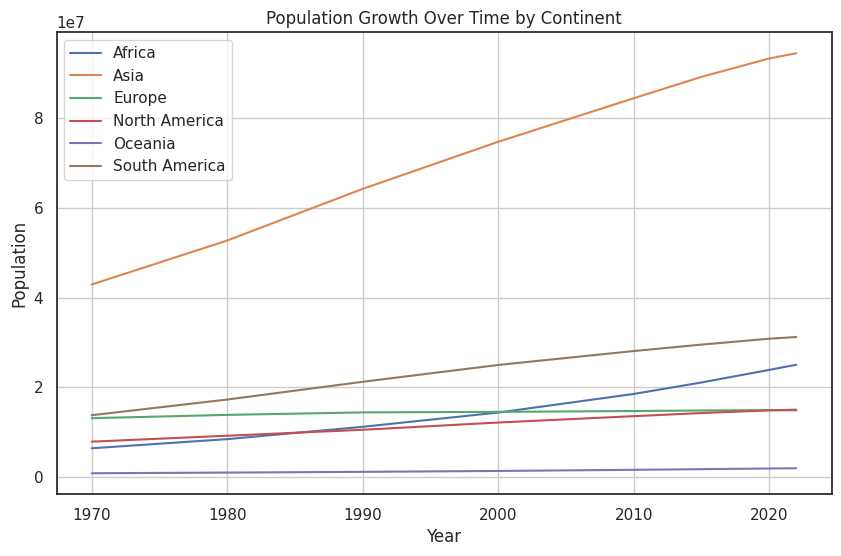

In [ ]:
# Chart - 8 visualization code

# Group data by continent and calculate the mean growth rate for each year
continent_growth = df.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population']].mean().reset_index()

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Melt the DataFrame to have years as a separate column
continent_growth_melted = pd.melt(continent_growth, id_vars=['Continent'], value_vars=['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population'], var_name='Year', value_name='Population')

# Convert 'Year' column to numeric
continent_growth_melted['Year'] = continent_growth_melted['Year'].str.extract('(\d+)').astype(int)

# Plot each continent's growth rate over time
for continent in continent_growth_melted['Continent'].unique():
    continent_data = continent_growth_melted[continent_growth_melted['Continent'] == continent]
    ax.plot(continent_data['Year'], continent_data['Population'], label=continent)  # Use 'Population' for y-axis

# Customize the chart
ax.set_xlabel('Year')
ax.set_ylabel('Population')  # Change y-axis label to 'Population'
ax.set_title('Population Growth Over Time by Continent')
ax.legend()
plt.grid(True)

# Show the chart
plt.show()

**Description**

The line chart shows the population growth trends for six continents (Africa, Asia, Europe, North America, Oceania, and South America) from 1970 to 2020. The chart is interesting and relevant as it provides a clear visual representation of how population growth rates have varied across different continents over the past 50 years, highlighting significant demographic trends and potential areas for business opportunities.

**1. Why Did You Pick the Specific Chart?**

This chart was chosen because it effectively visualizes the population growth trends across different continents over a significant period (1970-2020). It allows for a comparative analysis of how population growth rates differ among continents, providing valuable insights into demographic changes.

**2. What is/are the Insight(s) Found from the Chart?**

* Asia's Dominant Growth: Asia shows the most significant population growth, with a steep and continuous increase from 1970 to 2020. This indicates that Asia has experienced the highest population growth rate among all continents.

* Africa's Steady Increase: Africa also shows a notable increase in population, with a steady upward trend, indicating significant growth over the years.

* Moderate Growth in South America and North America: Both South America and North America show moderate population growth, with South America having a slightly higher growth rate than North America.

* Minimal Growth in Europe and Oceania: Europe and Oceania show minimal population growth, with Europe having the least growth among all continents. Oceania's growth is slightly higher but still relatively low compared to other continents.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

* Market Expansion: Businesses can identify regions with high population growth (Asia and Africa) as potential markets for expansion due to the increasing consumer base.

* Resource Allocation: Companies can allocate resources more efficiently by focusing on regions with significant population growth, ensuring better market penetration and customer reach.

* Product Development: Understanding demographic trends can help businesses develop products and services tailored to the needs of growing populations in specific regions.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason.**

The chart does not explicitly show negative growth (a decline in population) for any continent. However, the minimal growth observed in Europe could be a concern. This stagnation might indicate an aging population, lower birth rates, or higher emigration rates, which could lead to challenges such as a shrinking workforce and increased dependency ratios. Businesses operating in Europe might need to adapt by focusing on automation, targeting older demographics, or exploring new markets outside Europe.



###**Chart 9 - Bar Chart of Population distribution by continent**

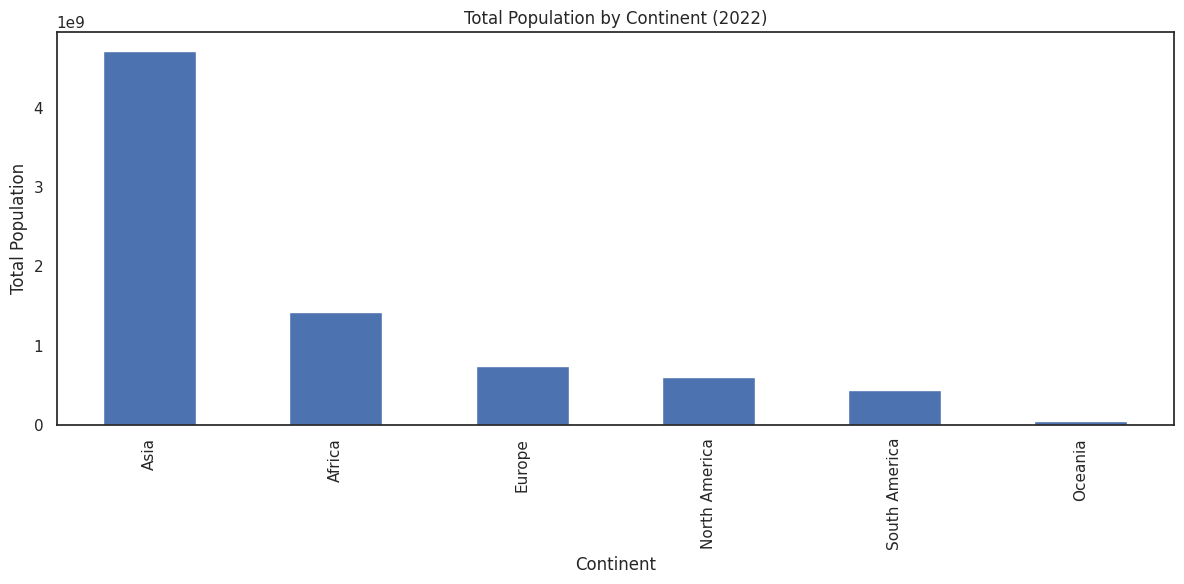

In [ ]:
# Chart - 9 visualization code

# Population distribution by continent
# Group data by continent and calculate the total population for 2022
continent_pop = df.groupby('Continent')['2022 Population'].sum().sort_values(ascending=False)

# Create a figure and axes for the plot
plt.figure(figsize=(12, 6))  # Set the figure size

# Create a bar plot of the total population by continent
continent_pop.plot(kind='bar')

# Set the title and labels for the plot
plt.title('Total Population by Continent (2022)')
plt.xlabel('Continent')
plt.ylabel('Total Population')

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**Description**

The bar chart shows the total population of each continent in 2022. The x-axis represents the continents (Asia, Africa, Europe, North America, South America, and Oceania), and the y-axis represents the total population in scientific notation (1e9, which equals 1 billion).


**1. Why Did You Pick the Specific Chart?**

The bar chart was chosen because it effectively visualizes the total population distribution across different continents. Bar charts are excellent for comparing discrete categories, making it easy to see differences in population sizes between continents at a glance.

2. What Insight(s) Are Found from the Chart? **bold text**

* Asia's Dominance: Asia has the highest population, significantly larger than any other continent, with a population exceeding 4 billion.

* Africa's Growth: Africa has the second-highest population, with over 1 billion people, indicating its growing demographic importance.

* Similar Sizes: Europe, North America, and South America have relatively similar population sizes, each ranging between 0.5 to 1 billion.

* Smallest Population: Oceania has the smallest population, significantly lower than all other continents.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

* Market Potential: Businesses can identify Asia and Africa as high-potential markets due to their large populations. This can guide marketing strategies, product launches, and expansion plans.

* Resource Allocation: Companies can allocate resources more efficiently by focusing on regions with higher population densities, ensuring better market penetration and customer reach.

* Supply Chain Management: Understanding population distribution can help in optimizing supply chains, ensuring that products are available where they are most needed.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason.**

There are no direct insights from this chart that indicate negative growth. However, some potential challenges could arise:

* Market Saturation: In highly populated regions like Asia, there might be intense competition, leading to market saturation. Businesses need to innovate continuously to maintain their market share.

* Infrastructure and Logistics: In regions with large populations, especially in developing continents like Africa, infrastructure and logistics might pose challenges. Companies need to invest in robust logistics solutions to overcome these hurdles.

###**Chart 10 - Bar Chart of Population of Top 10 Countries Over the Years**

In [ ]:
# Get the top 10 countries with the highest population in 2022
top_10_countries = df.sort_values(by=['2022 Population'], ascending=False).head(10)

# Select specific columns for the top 10 countries (Country and population data for different years)
top_10_populated_countries = top_10_countries[['Country', '1970 Population', '1980 Population', '1990 Population', '2000 Population',
                             '2010 Population', '2020 Population', '2022 Population']]

# Display the DataFrame containing the selected data for the top 10 countries
top_10_populated_countries

,Country,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2020 Population,2022 Population
41,China,822534450,982372466,1153704252,1264099069,1348191368,1424929781,1425887337
92,India,557501301,696828385,870452165,1059633675,1240613620,1396387127,1417173173
221,United States,200328340,223140018,248083732,282398554,311182845,335942003,338289857
93,Indonesia,115228394,148177096,182159874,214072421,244016173,271857970,275501339
156,Pakistan,59290872,80624057,115414069,154369924,194454498,227196741,235824862
149,Nigeria,55569264,72951439,95214257,122851984,160952853,208327405,218541212
27,Brazil,96369875,122288383,150706446,175873720,196353492,213196304,215313498
16,Bangladesh,67541860,83929765,107147651,129193327,148391139,167420951,171186372
171,Russia,130093010,138257420,148005704,146844839,143242599,145617329,144713314
131,Mexico,50289306,67705186,81720428,97873442,112532401,125998302,127504125


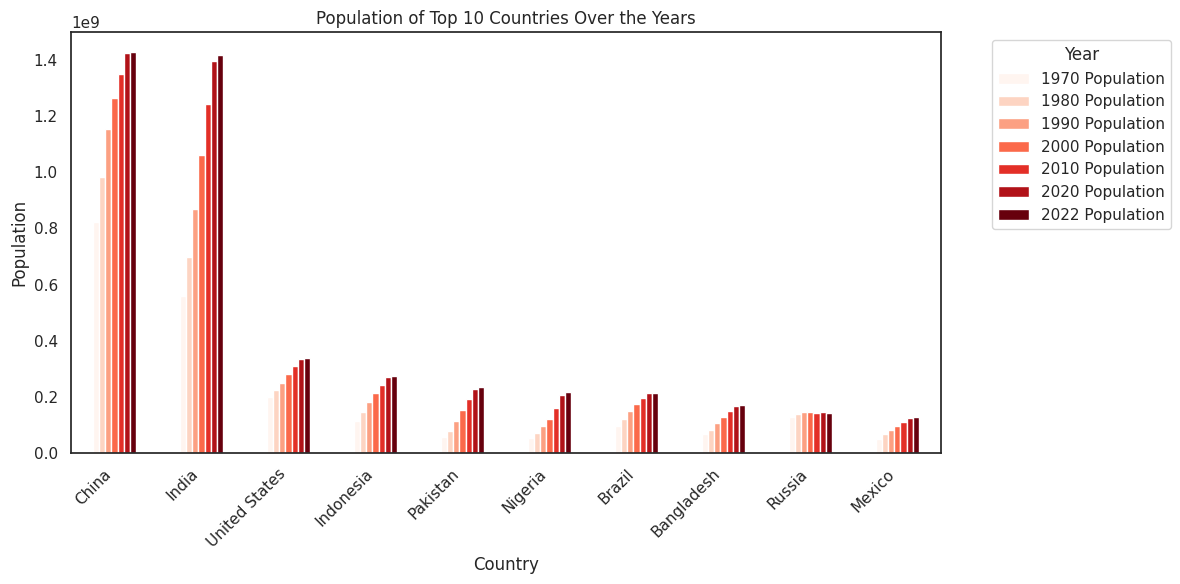

In [ ]:
# Chart - 10 visualization code

# Create a bar plot to visualize the population of the top 10 countries over the years
top_10_populated_countries.plot(
    x='Country',
    y=['1970 Population', '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2020 Population', '2022 Population'],
    kind='bar',
    figsize=(12, 6),
    colormap='Reds'
)

# Set the title and labels for the plot
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Population of Top 10 Countries Over the Years")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Place the legend outside the plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

**Description**

The bar chart shows the population of the top 10 most populous countries from 1970 to 2022. The population data is represented in billions and is color-coded by year, with lighter shades for earlier years and darker shades for more recent years. It provides a clear visual representation of population growth trends over time, highlighting significant changes and patterns in different countries.

**1. Why Did You Pick the Specific Chart?**

This chart was chosen because it effectively visualizes the population growth trends of the top 10 most populous countries over a span of more than 50 years. The use of color gradients to represent different years allows for easy comparison of population changes over time within each country, making it straightforward to identify trends and deviations.

**2. What Insight(s) Are Found from the Chart?**

* Consistent Growth in China and India: Both China and India show a consistent increase in population over the years, with India showing a steeper growth curve in recent years.

* United States Steady Growth: The United States shows steady but less dramatic growth compared to China and India.

* Rapid Growth in Nigeria: Nigeria shows significant population growth, especially from 2000 onwards, indicating a rapid increase in population.

* Moderate Growth in Other Countries: Countries like Indonesia, Pakistan, Brazil, Bangladesh, Russia, and Mexico show moderate population growth over the years.

* Russia's Population Decline: Russia shows a decline in population around the 1990s and early 2000s, which is an interesting deviation from the general trend of growth.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

Yes, the insights gained from this chart can help create a positive business impact in several ways:

* Market Expansion: Businesses can identify rapidly growing markets such as India and Nigeria for potential expansion.

* Resource Allocation: Companies can allocate resources more efficiently by understanding population trends and focusing on high-growth areas.

* Product Development: Insights into population growth can guide product development to meet the needs of larger, younger populations in rapidly growing countries.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason.**

Yes, the insight regarding Russia's population decline around the 1990s and early 2000s indicates negative growth. This decline could be due to various factors such as economic instability, lower birth rates, and higher mortality rates during that period. This negative growth could impact businesses that rely on a growing consumer base, leading to potential challenges in market sustainability and profitability in Russia.

###**Chart 11 - Bar Chart of Top 10 Populated Countries in 1970 and 2022**

In [ ]:
# Chart - 11 visualization code

# Calculate the top 10 most populated countries in 1970
top_10_populated_countries_1970 = df.groupby('Country')['1970 Population'].sum().sort_values(ascending=False).head(10)
# Calculate the top 10 most populated countries in 2022
top_10_populated_countries_2022 = df.groupby('Country')['2022 Population'].sum().sort_values(ascending=False).head(10)

# Store the data for both years in a dictionary
features = {'top_10_populated_countries_1970': top_10_populated_countries_1970,
            'top_10_populated_countries_2022': top_10_populated_countries_2022}

# Iterate through the features dictionary to create and display bar charts for each year
for feature_name, feature_data in features.items():
    year = feature_name.split('_')[-1]  # Extract the year from the feature name (e.g., '1970' or '2022')

    # Create a bar chart using Plotly Express
    fig = px.bar(x=feature_data.index,  # Country names on the x-axis
                y=feature_data.values,  # Population values on the y-axis
                text=feature_data.values,  # Display population values as text on bars
                color=feature_data.values,  # Color bars based on population values
                title=f'Top 10 Most Populated Countries ({year})',  # Set the title with the year
                template='plotly_white')  # Use a white background template

    # Update layout with axis labels
    fig.update_layout(xaxis_title='Country', yaxis_title='Population Growth')

    # Display the chart
    fig.show()

Comparison of the Bar Charts: Top 10 Populated Countries in 1970 and 2022

**Description**

The first image is a bar chart showing the population of the top 10 most populated countries in 1970. The second image is a bar chart showing the population of the top 10 most populated countries in 2022. Each chart uses bars to represent the population size in billions, with countries listed along the x-axis.

**1. Why Did You Pick the Specific Chart?**

The bar charts were chosen because they effectively visualize the population sizes of the top 10 most populated countries in two different years, 1970 and 2022. This comparison allows for a clear analysis of how population rankings and sizes have changed over time, making it easier to identify trends and shifts in demographic dynamics.

**2.Insights Found from the Charts**

* Consistent Leaders: China and India remain the top two most populated countries in both 1970 and 2022, with substantial population growth in both countries.

* Significant Growth in India: While China had the largest population in 1970 and continues to lead in 2022, India's population growth rate is notable and is nearing China's.

* Emergence of Nigeria: Nigeria is not in the top 10 in 1970 but shows significant growth and appears in the top 10 by 2022, reflecting its rapid population increase.

* Stable Western Populations: The United States and Brazil appear in both charts with stable growth, but their rankings fluctuate slightly due to varying growth rates in other countries.

* Decline and Stability in Russia: Russia, which had a higher rank in 1970, shows a lower ranking in 2022, indicating slower population growth or a population decline in comparison to other rapidly growing countries.

* New Entrants: Some countries that were not in the top 10 in 1970, such as Bangladesh and Mexico, appear in the 2022 chart, indicating significant population growth over the years.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

* Market Targeting: Businesses can focus on countries with significant population growth such as India and Nigeria for market expansion and product development.

* Resource Allocation: Understanding demographic shifts helps in allocating resources more effectively, ensuring businesses target regions with growing populations.

* Strategic Planning: Long-term planning can be informed by population trends, guiding decisions on where to invest in infrastructure, marketing, and new ventures.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason.**

* Demographic Shifts: Countries like Russia showing slower growth or a decline in population may indicate economic, social, or health challenges that could affect business operations and market size.

* Market Saturation: Countries with the largest populations, like China, may face market saturation, leading to increased competition and potentially lower profit margins.

* Infrastructure Strain: Rapidly growing countries like Nigeria may face challenges with infrastructure, affecting business logistics and operational efficiency.



###**Chart 12 - Bar Chart of Growth Of Population From 1970 to 2022 (Top 10)**

In [ ]:
# Chart - 12 visualization code

# Calculate the population growth for each country from 1970 to 2022
# Group data by country, sum the population for 2022 and 1970,
# subtract to find the growth, sort in descending order, and take the top 10 countries.
population_growth = (df.groupby(by='Country')['2022 Population'].sum() -
                     df.groupby(by='Country')['1970 Population'].sum()).sort_values(ascending=False).head(10)

# Create a bar chart using Plotly Express to visualize the population growth
fig = px.bar(x=population_growth.index,  # Country names on the x-axis
             y=population_growth.values,  # Population growth values on the y-axis
             text=population_growth.values,  # Display population growth values as text on bars
             color=population_growth.values,  # Color bars based on population growth values
             title='Growth Of Population From 1970 to 2022 (Top 10)',  # Set the title of the chart
             template='plotly_white')  # Use a white background template

# Update layout with axis labels
fig.update_layout(xaxis_title='Country', yaxis_title='Population Growth')

# Display the chart
fig.show()

**Description**

The bar chart shows the population growth of the top 10 countries over this period. The countries listed on the x-axis are India, China, Pakistan, Nigeria, Indonesia, United States, Brazil, Bangladesh, Ethiopia, and DR Congo. The y-axis represents population growth in millions, with a color gradient indicating the magnitude of growth.

This visualization is relevant for understanding demographic changes and potential market opportunities.

**1. Why Did You Pick the Specific Chart?**

The bar chart was chosen because it provides a clear and visual representation of the population growth of the top 10 countries from 1970 to 2022. Bar charts are excellent for comparing discrete quantities, making it easy to see differences in population growth among these countries.

**2. What Insight(s) Are Found from the Chart?**

* Highest Growth in India: India experienced the highest population growth, with an increase of approximately 856 million people. This significant growth highlights India's demographic expansion.

* Substantial Growth in China: China follows with substantial growth, adding around 603 million people. Despite the one-child policy, China's population has continued to grow significantly.

* Rapid Growth in Nigeria and Pakistan: Both Nigeria and Pakistan show notable population increases, indicating high growth rates in these countries.

* Steady Growth in the United States: The United States also shows a significant but steadier increase in population compared to some of the rapidly growing countries.

* Emerging Growth in Ethiopia and DR Congo: Ethiopia and DR Congo exhibit substantial growth, reflecting their rising populations.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

* Market Expansion: Businesses can identify rapidly growing markets such as India, Nigeria, and Pakistan for potential expansion and investment. The large and growing populations in these countries represent significant market opportunities.

* Resource Allocation: Understanding demographic trends helps in efficient resource allocation, ensuring businesses focus on high-growth areas with increasing consumer bases.

Strategic Planning: Insights into population growth can guide long-term strategic planning, allowing businesses to anticipate future market needs and opportunities.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason.**

There are no direct insights from this chart that indicate negative growth. All the countries listed have experienced population increases. However, some potential challenges include:

* Infrastructure Strain: Rapid population growth in countries like India and Nigeria can strain infrastructure and resources, potentially impacting business operations and logistics.

* Economic and Social Challenges: Countries with high population growth may face economic and social challenges, such as unemployment, healthcare, and education, which could impact the overall business environment.

###**Chart 13 - Heat Map of Population Growth Correlation Matrix**

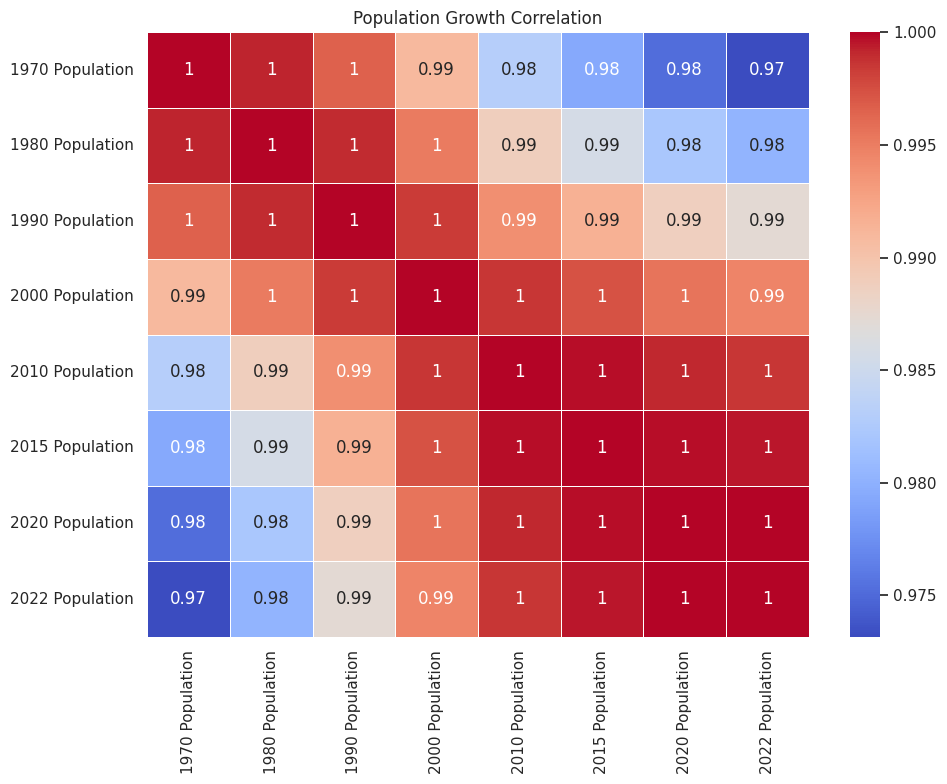

In [ ]:
# Chart - 13 visualization code

# Population growth correlation analysis

# Select the columns representing population data for different years
growth_cols = ['1970 Population', '1980 Population', '1990 Population',
                   '2000 Population', '2010 Population', '2015 Population',
                   '2020 Population', '2022 Population']

# Calculate the correlation matrix for the selected population columns
growth_correlation = df[growth_cols].corr()

# Create a figure and axes for the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size

# Create a heatmap to visualize the correlation matrix
sns.heatmap(growth_correlation,  # Data for the heatmap (correlation matrix)
            annot=True,  # Display correlation values on the heatmap
            cmap='coolwarm',  # Use the 'coolwarm' colormap
            linewidths=0.5)  # Set the width of the lines between cells

# Set the title of the heatmap
plt.title('Population Growth Correlation')

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Display the heatmap
plt.show()

**Description**

The heatmap showing the correlation matrix of population growth from 1970 to 2022 uses a color gradient from blue to red to represent correlation values, with blue indicating lower correlation and red indicating higher correlation. The correlation values range from 0.97 to 1.00, indicating very high correlations across the years. This visualization is interesting and relevant as it provides insights into the consistency and stability of population growth trends over time.

**1. Why Did You Pick the Specific Chart?**

The heat map was chosen because it effectively visualizes the relationship between population growth rates over different periods. By showing the correlations, it allows for a clear understanding of how growth rates are related across time, highlighting patterns of consistency and change.

**2. What Insight(s) Are Found from the Chart?**

* High Correlation Across Years: The population growth rates from different years show very high correlation values, mostly above 0.98. This indicates that population growth trends are consistent over time.

* Slight Decrease Over Time: There is a slight decrease in correlation as the time gap increases. For example, the correlation between 1970 and 2022 is 0.97, which is slightly lower than the correlation between more recent years.

* Stability in Recent Years: The correlation between recent years (2010 onwards) is consistently 1.00, indicating very stable population growth trends in the last decade.

**3. Will the Gained Insights Help Create a Positive Business Impact?**

* Long-term Planning: The high correlation over the years suggests that population growth trends are predictable, which can aid in long-term business planning and forecasting.

* Market Stability: The stability in recent years indicates a stable market environment, which is beneficial for businesses looking to invest or expand.

* Resource Allocation: Understanding consistent growth trends can help in better allocation of resources, ensuring that supply meets the demand driven by population growth.

**4. Are There Any Insights That Lead to Negative Growth? Justify with Specific Reason**.

No, there are no insights from the chart that indicate negative growth. The correlation values are all very high, suggesting consistent and stable population growth over the years. There is no indication of a decline or negative trend in the population growth data.


#**5. Feature Manipulation & Selection**

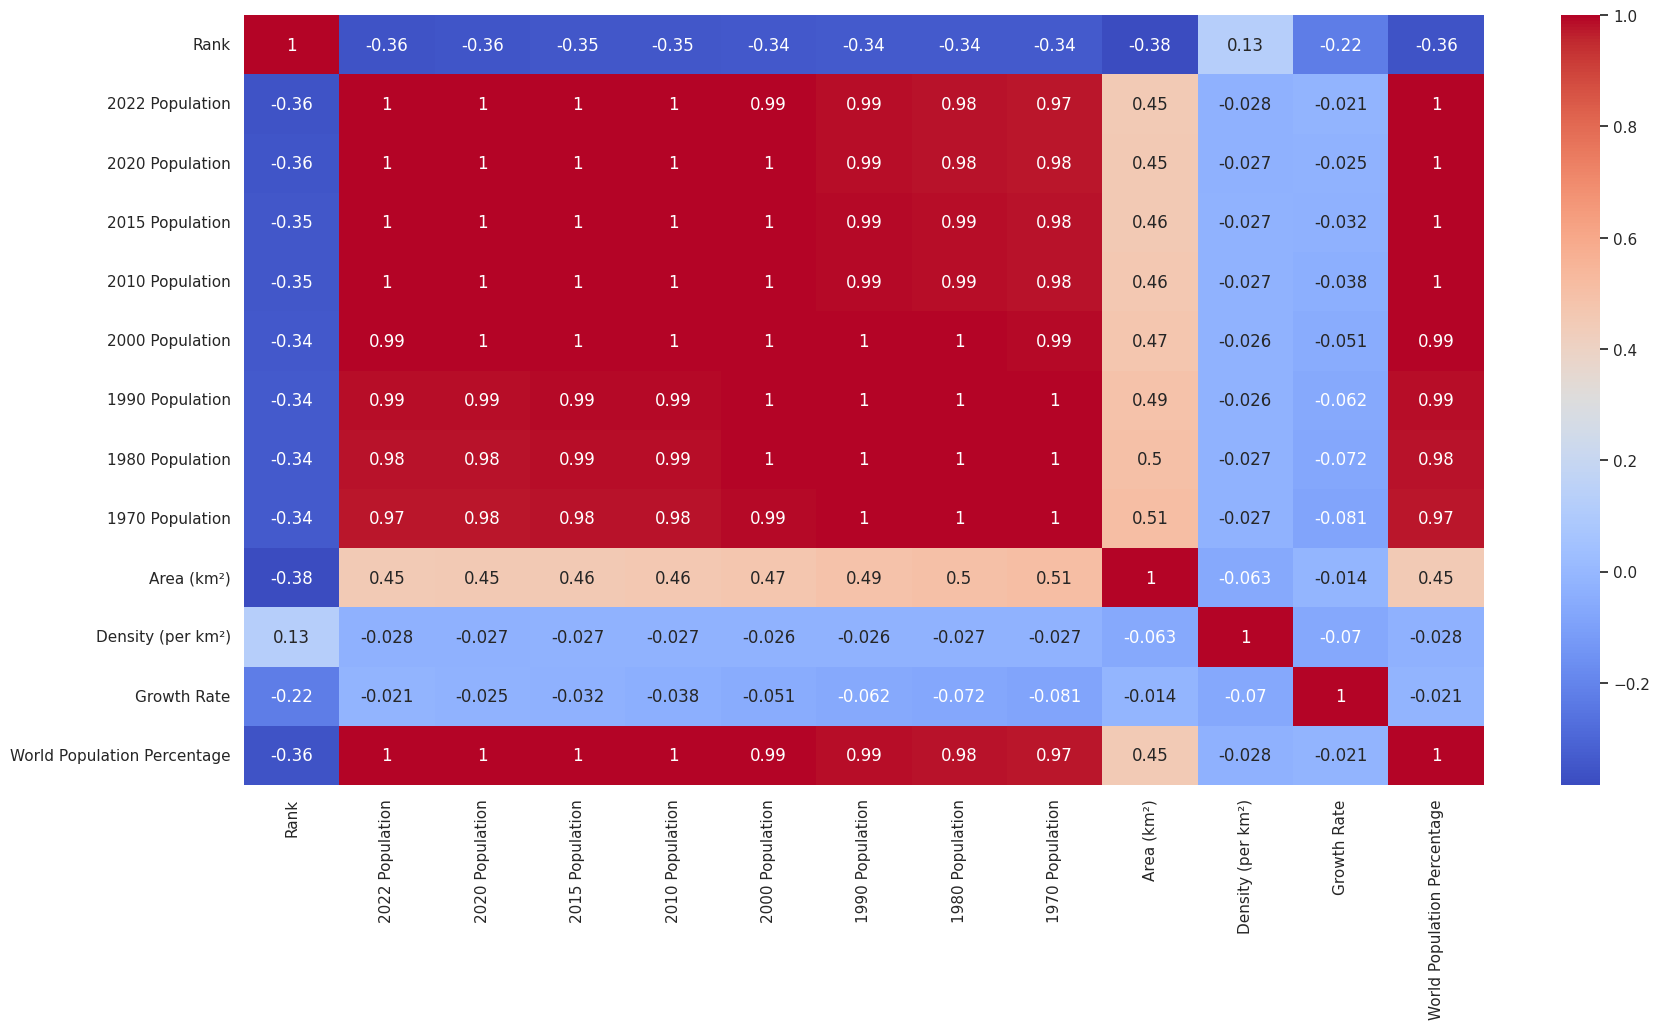

In [ ]:
# Manipulate Features to minimize feature correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")  # Changed color map to 'coolwarm'
plt.show()



* The population metrics from different years (e.g., 2022, 2020, 2015, etc.) show very high positive correlations with each other, indicating that countries with high populations in one year generally had high populations in other years too. These correlations are close to 1.

* Rank is negatively correlated with population metrics, with values around -0.88. This implies that higher-ranked countries (those with smaller numerical ranks) have larger populations.

* Area has a moderate positive correlation with population metrics (around 0.44). This suggests that larger areas tend to have higher populations, but the relationship is not very strong.

* Density has a very weak negative correlation with population metrics (around -0.1). This indicates that higher population does not necessarily mean higher population density.

* Growth Rate shows weak correlations with other metrics. The highest is 0.12 with the 2022 Population, indicating that the rate of population growth does not strongly correlate with the absolute population figures.

* World Population Percentage is positively correlated with population metrics (around 0.44). This makes sense, as larger population countries contribute more to the world population percentage.It also has a moderate positive correlation with Area (0.45).

**1. Data Splitting**

In [ ]:
# Select relevant features for prediction
features = ['1970 Population', '1980 Population', '1990 Population',
                '2000 Population', '2010 Population', '2015 Population',
                '2020 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate']

X = df[features]
y = df['2022 Population']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**What data splitting ratio have you used and why?**


I have used 80-20 split ratio. This optimal ratio provides enough data for the model to train and test.

**2. Data Scaling**

In [ ]:
# Scale Features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**7. ML Model Implementation**

In [ ]:
# Define and Train Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'XGBoost': XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

results = {}

**Evaluation Metric Score Chart**

Model: Linear Regression
  MSE: 348214754583.78
  MAE: 273159.31
  R-squared: 1.00
--------------------
Model: Decision Tree
  MSE: 103463012217989.11
  MAE: 3350012.43
  R-squared: 0.97
--------------------
Model: Random Forest
  MSE: 126647803595518.25
  MAE: 3609969.13
  R-squared: 0.96
--------------------
Model: Support Vector Regression
  MSE: 3979095563061346.50
  MAE: 29040034.95
  R-squared: -0.22
--------------------
Model: XGBoost
  MSE: 100662938392362.39
  MAE: 3818112.41
  R-squared: 0.97
--------------------
Model: K-Nearest Neighbors
  MSE: 729928638080252.12
  MAE: 9938699.24
  R-squared: 0.78
--------------------


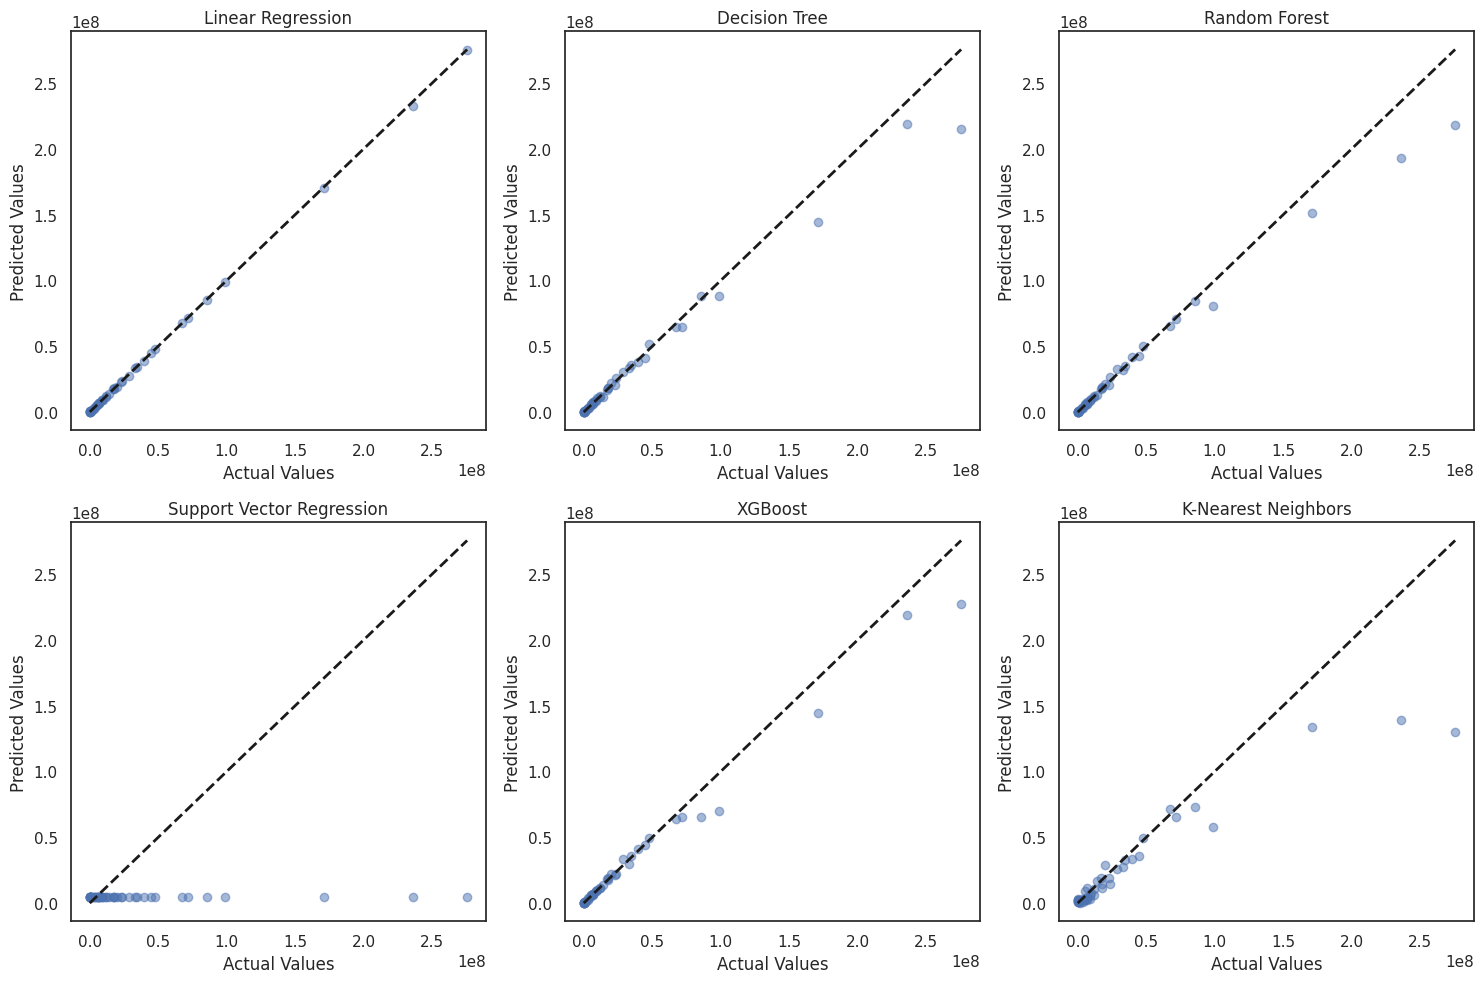

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create subplots before the loop
axes = axes.ravel()  # Flatten the axes array

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions

    # 5. Evaluate Performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'MAE': mae, 'R-squared': r2, 'Predictions': y_pred}

    print(f"Model: {name}")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-" * 20)

    # Plot scatter plot on the current subplot
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')
    axes[i].set_title(name)

plt.tight_layout()
plt.show()  # Display the plots after the loop

**Visualizing evaluation Metric Score chart**

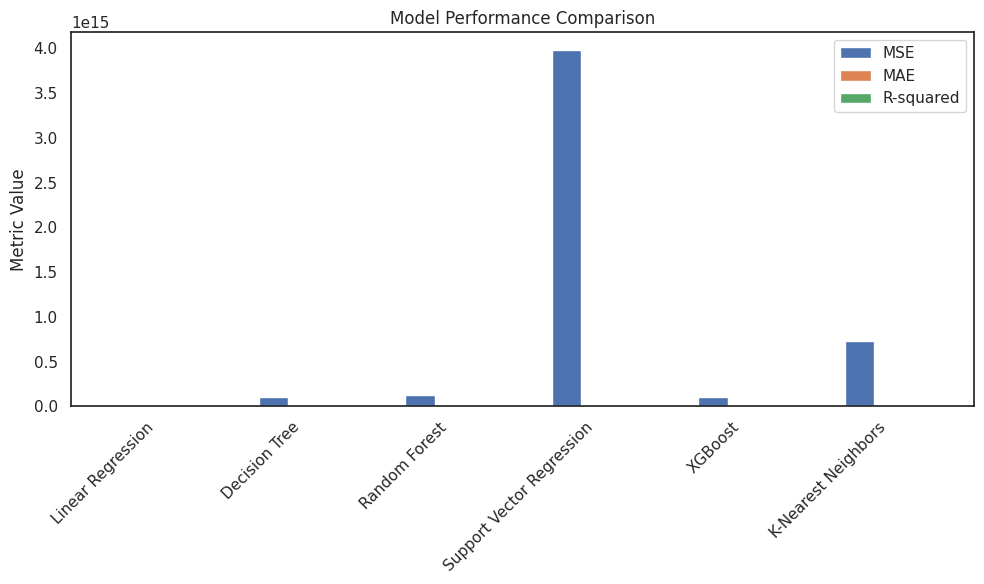


Best Model: Linear Regression
Metrics: {'MSE': 348214754583.7778, 'MAE': 273159.3132700066, 'R-squared': 0.9998934504451947, 'Predictions': array([ 4.99681257e+05,  7.12929480e+07, -8.97803792e+04,  2.60536733e+06,
        2.22644139e+05,  6.69482869e+06,  4.75978798e+07,  2.75218339e+08,
        8.53064005e+07,  1.51027438e+06,  3.44667080e+07,  9.87636717e+07,
        2.71796563e+07,  6.52223306e+06,  8.70544756e+06,  6.97770414e+06,
        1.15859414e+07,  4.89019667e+06,  5.20530087e+05,  1.22624233e+07,
        8.99831152e+06,  2.85360357e+03,  4.44354215e+07,  1.74425167e+07,
        6.74108270e+07,  2.96819406e+06,  7.81035071e+05,  1.74551423e+07,
        1.39946845e+07,  9.36782525e+06,  5.28049831e+06,  8.86967228e+05,
        5.14542206e+06,  3.31655118e+07,  6.00052642e+05,  1.92129855e+07,
        3.84865430e+07,  1.70200592e+08,  2.32543283e+08, -1.33476037e+05,
        6.79084064e+06,  2.36925427e+07,  2.27661532e+07,  3.75040989e+06,
        6.20500941e+05, -1.4123768

In [ ]:
# Comparison Graph
metrics = ['MSE', 'MAE', 'R-squared']
model_names = list(results.keys())

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Width of the bars

for i, metric in enumerate(metrics):
    values = [results[name][metric] for name in model_names]
    x_pos = [j + i * width for j in range(len(model_names))]
    ax.bar(x_pos, values, width, label=metric)

ax.set_xticks([j + width for j in range(len(model_names))])
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Metric Value')
ax.set_title('Model Performance Comparison')
ax.legend()
plt.tight_layout()
plt.show()

# Print the Best Model
best_model = min(results, key=lambda k: results[k]['MSE'])  # Based on MSE
print(f"\nBest Model: {best_model}")
print(f"Metrics: {results[best_model]}")

**Conclusion**

Best Performers: Linear Regression, with a perfect R-squared and low error metrics.

Good Performers: Decision Tree and XGBoost, with high R-squared values and acceptable error metrics.

Moderate Performer: Random Forest, with a strong fit but higher errors compared to other models.

Poor Performer: Support Vector Regression, with very high errors and a negative R-squared.

K-Nearest Neighbors: Performs worse than the best models, with relatively high error metrics.